In [1]:
import pandas as pd
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2844\336697630.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('./open/open/train.csv')
df_test = pd.read_csv('./open/open/test.csv')

In [145]:
df.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [136]:
df_train = df.drop('Income', axis=1)

In [137]:
df_train.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [138]:
df_test.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [139]:
df_train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status'],
      dtype='object')

In [140]:
df_train = df_train.drop(['ID', 'Household_Status'], axis=1)
df_test = df_test.drop(['ID', 'Household_Status'], axis=1)

In [142]:
df_train['Working_Week (Yearly)'] = df_train['Working_Week (Yearly)'].apply(lambda x: 1 if x == 52 else 0)
df_test['Working_Week (Yearly)'] = df_test['Working_Week (Yearly)'].apply(lambda x: 1 if x == 52 else 0)

In [147]:
df_train['Gains'] = df_train['Gains'].apply(lambda x: 1 if x > 0 else 0)
df_test['Gains'] = df_test['Gains'].apply(lambda x: 1 if x == 52 else 0)
df_train['Losses'] = df_train['Losses'].apply(lambda x: 1 if x == 52 else 0)
df_test['Losses'] = df_test['Losses'].apply(lambda x: 1 if x == 52 else 0)

In [9]:
df['Gender'].value_counts()

Gender
F    10472
M     9528
Name: count, dtype: int64

In [10]:
df['Education_Status'].value_counts()

Education_Status
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: count, dtype: int64

In [11]:
edu_mean = df.groupby('Education_Status')['Income'].mean()

In [12]:
edu_mean = edu_mean.sort_values(ascending=False)

In [13]:
edu_mean

Education_Status
Associates degree (Vocational)    867.269906
Associates degree (Academic)      782.740558
Bachelors degree                  699.367076
High graduate                     664.652140
College                           651.468108
Masters degree                    616.102970
Doctorate degree                  575.528736
Professional degree               547.036036
High Junior                       483.034146
High Senior                       459.942149
High Sophomore                    408.658323
High Freshman                     366.794595
Middle (7-8)                      346.883212
Elementary (1-4)                  343.440000
Elementary (5-6)                  325.116719
Kindergarten                      187.640625
Children                            0.000000
Name: Income, dtype: float64

In [16]:
nation_mean = df.groupby('Birth_Country')['Income'].mean().sort_values(ascending=False)

In [17]:
nation_mean

Birth_Country
Trinadad&Tobago                 1115.000000
Philippines                      836.473214
England                          835.872340
Peru                             793.409091
Ireland                          755.190476
Hong Kong                        739.062500
Yugoslavia                       731.285714
Scotland                         707.142857
Jamaica                          697.022222
Thailand                         663.800000
Unknown                          622.233333
Poland                           591.444444
Iran                             571.583333
US                               560.650659
Portugal                         539.827586
Ecuador                          517.096774
Germany                          516.777778
Cambodia                         500.000000
Greece                           494.230769
Italy                            485.028571
Guatemala                        467.750000
Canada                           461.906667
El-Salvador       

In [18]:
df.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


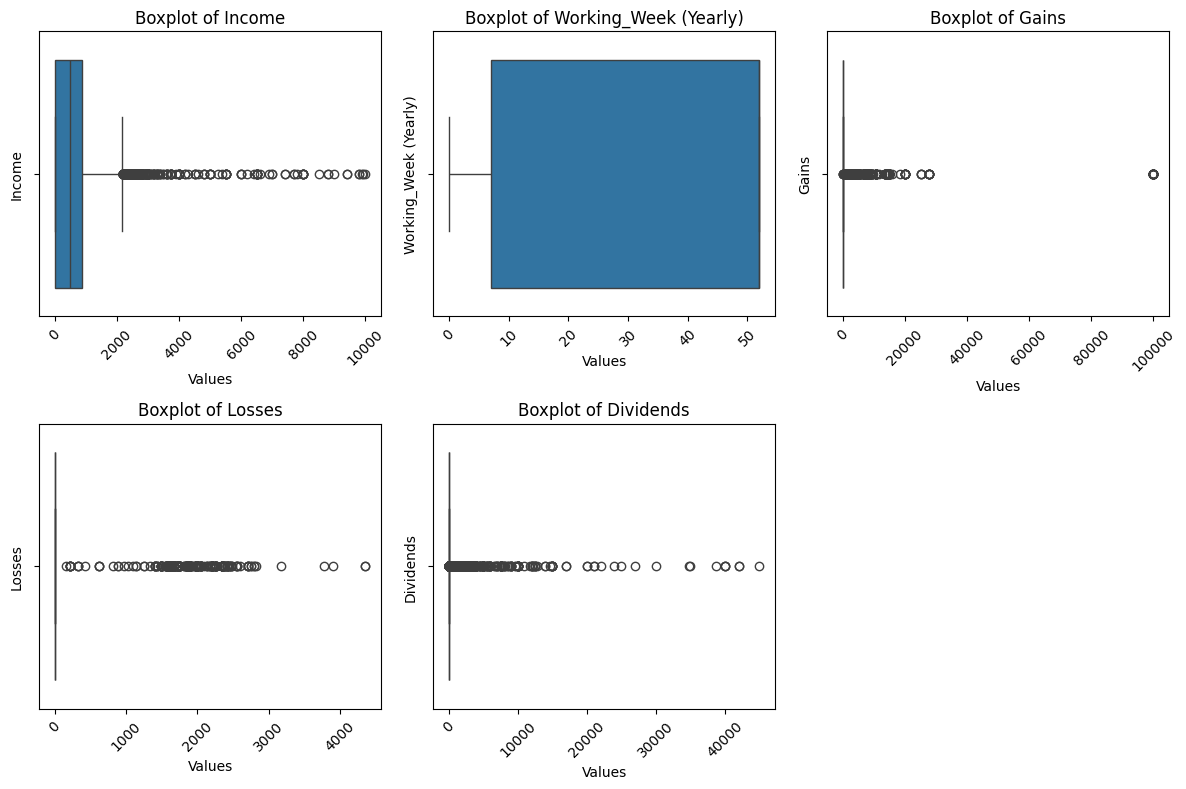

In [19]:
numeric_variables = ['Income', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends']
numeric_variables_test = ['Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends']

# 각 변수마다 상자 그림 그리기
plt.figure(figsize=(12, 8))
for i, variable in enumerate(numeric_variables):
    plt.subplot(2, 3, i+1)  # 2x3 그리드 중에 i+1번째 위치
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot of {variable}')
    plt.xlabel('Values')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  # x축 레이블 회전

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()

In [20]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('./open/open/train.csv')
df_test = pd.read_csv('./open/open/test.csv')

In [22]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체 생성
scaler = RobustScaler()
df[numeric_variables] = scaler.fit_transform(df[numeric_variables])

In [23]:
df_test[numeric_variables_test] = scaler.fit_transform(df_test[numeric_variables_test])

## LightGBM

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [25]:
df_test = df_test.drop(['Household_Status', 'Occupation_Status', 'Employment_Status'], axis = 1) 
df = df.drop(['Household_Status', 'Occupation_Status', 'Employment_Status'], axis = 1)
# df['Education_Status'] = df['Education_Status'].apply(lambda x: edu_label(x))
# df_test['Education_Status'] = df_test['Education_Status'].apply(lambda x: edu_label(x))

In [26]:
df = df.drop('ID', axis=1)
df_test = df_test.drop('ID', axis=1)

In [27]:
X = df.drop(['Income'], axis=1)
y = df['Income']

In [28]:
X = pd.get_dummies(X, drop_first=True)

In [29]:
df_submission = pd.get_dummies(df_test, drop_first=True)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 208 entries, Age to Income_Status_Unknown
dtypes: bool(203), float64(4), int64(1)
memory usage: 4.6 MB


In [31]:
submission_columns = df_submission.columns.tolist()
X_columns = X.columns.tolist()

# df_submission에만 있는 column 찾기
submission_only_columns = [col for col in submission_columns if col not in X_columns]

# X에만 있는 column 찾기
X_only_columns = [col for col in X_columns if col not in submission_columns]

print("Columns in df_submission but not in X:", submission_only_columns)
print("Columns in X but not in df_submission:", X_only_columns)

Columns in df_submission but not in X: []
Columns in X but not in df_submission: ['Birth_Country_Holand-Netherlands', 'Birth_Country (Father)_Panama']


In [32]:
for col in X_only_columns:
    df_submission[col] = False

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lgbm_regressor = LGBMRegressor()

# 모델을 학습용 데이터로 학습
lgbm_regressor.fit(X_train, y_train)

# 학습용 데이터로 예측
y_train_pred = lgbm_regressor.predict(X_train)

# RMSE 계산
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Train RMSE:", train_rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 143
[LightGBM] [Info] Start training from score 0.066774
Train RMSE: 0.6158644866381728


C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
for i, column in enumerate(X_train.columns):
    try:
        print(f"{column}: {feature_importance[i]}")
    except:
        continue

In [35]:
y_submission = lgbm_regressor.predict(df_submission)

In [36]:
submission['Income'] = y_submission

NameError: name 'submission' is not defined

In [ ]:
submission.to_csv('./lgbm_submission2.csv', index=False)

In [ ]:
lgbm = LGBMRegressor()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')

# GridSearchCV 수행 (최적의 하이퍼파라미터 탐색)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 하이퍼파라미터로 모델 생성 및 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = best_model.predict(X_test)

# RMSE 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

## RandomForest & DTR

* 전반적으로 결괏값이 좋지 않아 제출하지는 않음


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Random Forest Regressor 모델 생성
rf_model = RandomForestRegressor()
# 모델을 학습용 데이터로 학습
rf_model.fit(X_train, y_train)

# Decision Tree Regressor 모델 생성
dt_model = DecisionTreeRegressor()
# 모델을 학습용 데이터로 학습
dt_model.fit(X_train, y_train)

# 각 모델로 예측
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# RMSE 계산
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print("Random Forest Regressor RMSE:", rmse_rf)
print("Decision Tree Regressor RMSE:", rmse_dt)

In [ ]:
feature_importance_dt = dt_model.feature_importances_

# 각 피처와 그에 대응하는 중요도를 출력
for i, column in enumerate(X_train.columns):
    print(f"{column}: {feature_importance_dt[i]}")


In [ ]:
feature_importance_rf = rf_model.feature_importances_

# 각 피처와 그에 대응하는 중요도를 출력
for i, column in enumerate(X_train.columns):
    print(f"{column}: {feature_importance_rf[i]}")

### Catboost

* 총 3회 제출
* 단순히 겹친다고 생각한 컬럼을 추가 드롭했더니 결과 악화
* 로그형으로 이산형 변수 처리 후 마지막 제출
* 553.257, 547.845

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     20000 non-null  int64 
 1   Gender                  20000 non-null  object
 2   Education_Status        20000 non-null  object
 3   Employment_Status       20000 non-null  object
 4   Working_Week (Yearly)   20000 non-null  int64 
 5   Industry_Status         20000 non-null  object
 6   Occupation_Status       20000 non-null  object
 7   Race                    20000 non-null  object
 8   Hispanic_Origin         20000 non-null  object
 9   Martial_Status          20000 non-null  object
 10  Household_Summary       20000 non-null  object
 11  Citizenship             20000 non-null  object
 12  Birth_Country           20000 non-null  object
 13  Birth_Country (Father)  20000 non-null  object
 14  Birth_Country (Mother)  20000 non-null  object
 15  Ta

In [91]:
cat_sub

array([ 3.23576424e+01,  1.73885175e+00,  4.08204348e+02, ...,
        3.29298838e+02, -2.04275155e-01,  4.96021091e+02])

In [149]:
X = df_train
y = df['Income']

In [150]:
X_cat = X[X.columns.difference(X.describe().columns)]

In [151]:
cat_features = list(X_cat.columns)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# CatBoost 모델 생성
model = CatBoostRegressor(cat_features = cat_features + ['Gains', 'Losses', 'Working_Week (Yearly)'])

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

Learning rate set to 0.06063
0:	learn: 695.5066143	total: 16.9ms	remaining: 16.8s
1:	learn: 687.1852673	total: 31.1ms	remaining: 15.5s
2:	learn: 679.7966650	total: 45ms	remaining: 15s
3:	learn: 673.0618360	total: 60.6ms	remaining: 15.1s
4:	learn: 666.8377867	total: 73.7ms	remaining: 14.7s
5:	learn: 660.9583172	total: 86.4ms	remaining: 14.3s
6:	learn: 655.9268478	total: 96.5ms	remaining: 13.7s
7:	learn: 651.2272548	total: 111ms	remaining: 13.8s
8:	learn: 647.0515136	total: 127ms	remaining: 14s
9:	learn: 643.2919618	total: 143ms	remaining: 14.1s
10:	learn: 640.4119912	total: 150ms	remaining: 13.5s
11:	learn: 637.1348048	total: 163ms	remaining: 13.5s
12:	learn: 634.3867346	total: 180ms	remaining: 13.6s
13:	learn: 631.6298008	total: 195ms	remaining: 13.7s
14:	learn: 629.1155117	total: 211ms	remaining: 13.9s
15:	learn: 627.0162433	total: 231ms	remaining: 14.2s
16:	learn: 624.8748739	total: 251ms	remaining: 14.5s
17:	learn: 622.8156096	total: 266ms	remaining: 14.5s
18:	learn: 621.3176882	tot

In [160]:
cat_sub = model.predict(df_test)

In [157]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 586.4840895893243


In [158]:
feature_importance = model.get_feature_importance(type="PredictionValuesChange")

# 특성 중요도 출력
for i, importance in enumerate(feature_importance):
    print("Feature {}: {:.2f}%".format(i, importance))

Feature 0: 5.72%
Feature 1: 2.76%
Feature 2: 6.23%
Feature 3: 4.74%
Feature 4: 1.51%
Feature 5: 16.34%
Feature 6: 24.35%
Feature 7: 2.47%
Feature 8: 3.07%
Feature 9: 4.07%
Feature 10: 3.61%
Feature 11: 3.83%
Feature 12: 1.50%
Feature 13: 1.26%
Feature 14: 1.62%
Feature 15: 3.12%
Feature 16: 0.34%
Feature 17: 0.00%
Feature 18: 6.69%
Feature 19: 6.77%


In [159]:
submission = pd.read_csv('./open/open/sample_submission.csv')

In [161]:
submission['Income'] = cat_sub

In [162]:
submission.to_csv('./cat_submission4.csv', index=False)